In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
from google.colab import drive

import sklearn.neighbors as nb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import (
    mutual_info_classif,
    SelectKBest
)
from sklearn.model_selection import (
    StratifiedKFold,
    cross_val_score,
    cross_val_predict,
    GridSearchCV
)
from sklearn.feature_selection import (
    mutual_info_classif,
    SelectKBest,
)

from sklearn.preprocessing import LabelEncoder

%matplotlib inline

Load Data:

In [2]:
uploaded = files.upload()

Saving cancer_preprocesado.csv to cancer_preprocesado.csv


In [4]:
df = pd.read_csv('/content/cancer_preprocesado.csv')
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [5]:
X = df.values[:, :-1]
y = df.values[:,-1]
print(X.shape)
print(y.shape)

(1000, 23)
(1000,)


Las relaciones entre las variables y el resultado

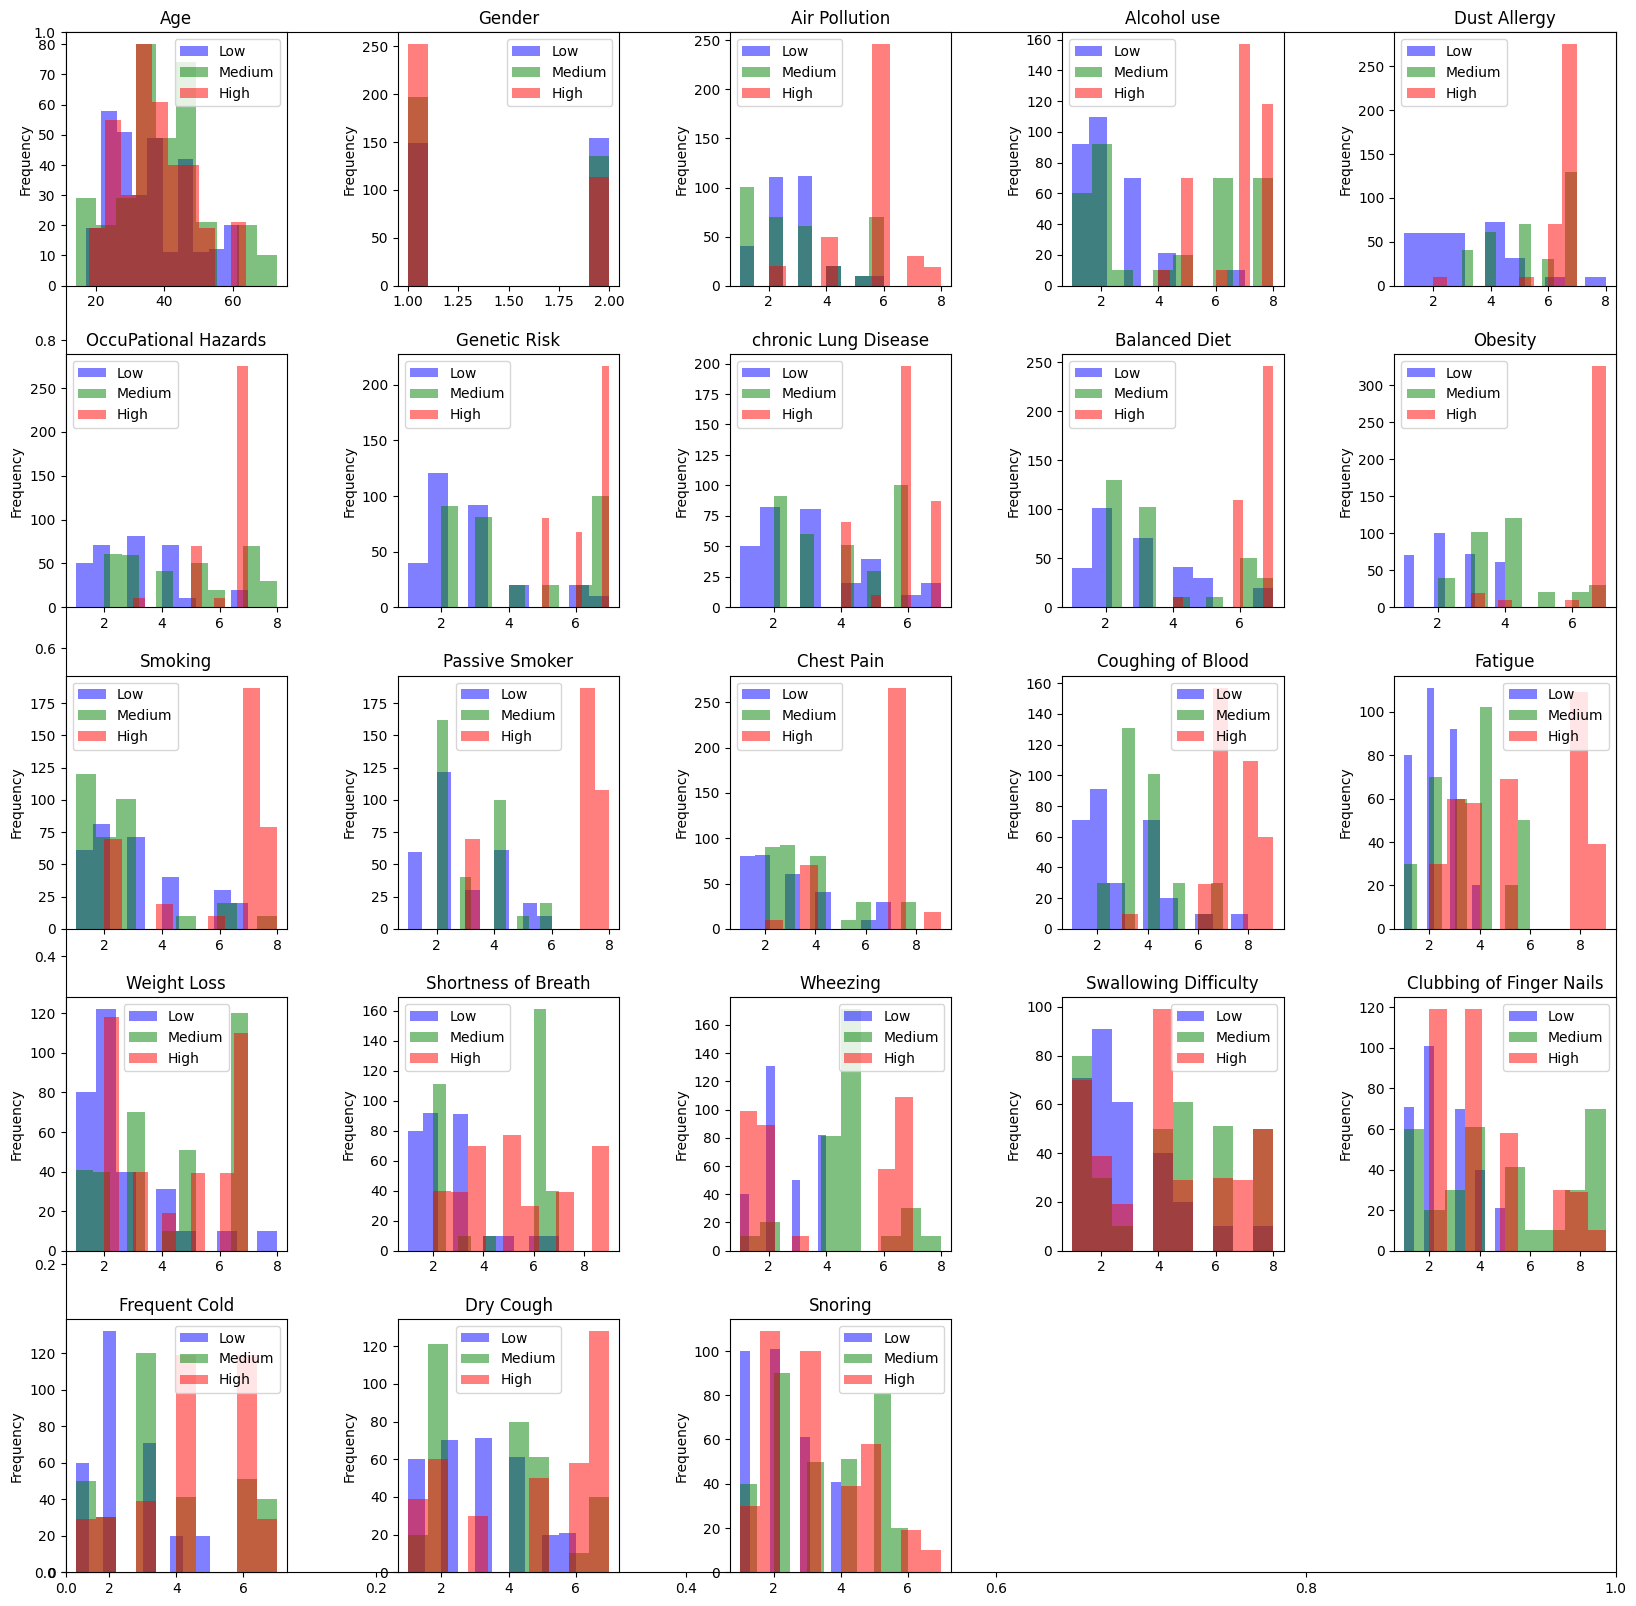

In [6]:
plt.subplots(figsize=(20, 20))
plt.subplots_adjust(hspace=0.27, wspace=0.5)
for i in range(1,24):
    plt.subplot(5,5,i)
    column_name = df.columns[i-1]
    df[df['Level'] == "Low"][column_name].plot.hist(bins=10, alpha=0.5, label='Low', color='blue')
    df[df['Level'] == "Medium"][column_name].plot.hist(bins=10, alpha=0.5, label='Medium', color='green')
    df[df['Level'] == "High"][column_name].plot.hist(bins=10, alpha=0.5, label='High', color='red')
    plt.title(f'{column_name}')
    plt.legend()
plt.show()

Empazamos para ver probar el KNN

In [ ]:
cv = StratifiedKFold(n_splits = 5)

cv_scores = cross_val_score(
    nb.KNeighborsClassifier(),
    X = X,
    y = y,
    cv = cv,
    scoring = "accuracy"
)
print(f"Mean scores: {np.mean(cv_scores)}")

Mean scores: 0.998


Datos no estandarizados

In [ ]:
for i in range(20):
    print('std:',X[:,i].std(),'min',X[:,i].min(),'max',X[:,i].max())

std: 11.999488489098203 min 14 max 73
std: 0.49030194778320396 min 1 max 2
std: 2.02938414303452 min 1 max 8
std: 2.619166088662566 min 1 max 8
std: 1.9798421654263223 min 1 max 8
std: 2.1067510531621823 min 1 max 8
std: 2.125935088378755 min 1 max 7
std: 1.8475930287809599 min 1 max 7
std: 2.1344598848420824 min 1 max 7
std: 2.12385851694505 min 1 max 7
std: 2.4946534829510916 min 1 max 8
std: 2.310622210574455 min 1 max 8
std: 2.279069108210632 min 1 max 9
std: 2.4267507082516633 min 1 max 9
std: 2.243493704025042 min 1 max 9
std: 2.20544213254395 min 1 max 8
std: 2.2839439572809166 min 1 max 9
std: 2.0408995565681383 min 1 max 8
std: 2.2692474523506676 min 1 max 8
std: 2.386853786891858 min 1 max 9


Estandarizamos Datos

In [ ]:
scaler = StandardScaler().fit(X)
X2=scaler.transform(X)

for i in range(13):
    print('std:',X2[:,i].std(),'min',X2[:,i].min(),'max',X2[:,i].max())

std: 1.0 min -1.9312489879092853 max 2.9856272650745685
std: 0.9999999999999999 min -0.8199029227143814 max 1.2196565865253737
std: 1.0000000000000002 min -1.3994393371741625 max 2.0498829727621537
std: 0.9999999999999998 min -1.3603566476455784 max 1.3122497327976013
std: 1.0 min -2.103703049027213 max 1.4319323274891114
std: 1.0 min -1.8227117979773821 max 1.499939917085554
std: 1.0 min -1.6839648677750145 max 1.1383226201160712
std: 0.9999999999999999 min -1.8294072056713275 max 1.4180612067629816
std: 1.0 min -1.6355425673686577 max 1.1754730167653862
std: 0.9999999999999999 min -1.6314646066839011 max 1.1935823312968803
std: 0.9999999999999998 min -1.18172724995562 max 1.6242736827748208
std: 0.9999999999999999 min -1.3827444336760142 max 1.6467425884623577
std: 1.0 min -1.5085106404251523 max 2.001694456550188


Vemos que aparentemente al estandarizar mejoramos el accuracy

In [ ]:
cv_scores = cross_val_score(
    nb.KNeighborsClassifier(),
    X = X2,
    y = y,
    cv = cv,
    scoring = "accuracy"
)
print(f"Mean scores: {np.mean(cv_scores)}")

Mean scores: 1.0


Aquí hacemos una prueba con las primeras 5 variables con el KNN

In [ ]:
cv_scores = cross_val_score(
    nb.KNeighborsClassifier(),
    X = X2[:,:5],
    y = y,
    cv = cv,
    scoring = "accuracy"
)
print(f"Mean scores: {np.mean(cv_scores)}")

Mean scores: 0.9570000000000001


Vemos que seleccionando los 4 mejores parámetros (4-best) obtenemos 1.0 de accuracy

In [ ]:
X_new = SelectKBest(
    mutual_info_classif,
    k = 4
).fit_transform(X, y)

cv_scores = cross_val_score(
    nb.KNeighborsClassifier(),
    X = X_new,
    y = y,
    cv = cv,
    scoring = "accuracy"
)
print(f"Mean scores: {np.mean(cv_scores)}")

Mean scores: 1.0


Aquí podemos observar la evolución del accuracy según el número de k-best que escojamos

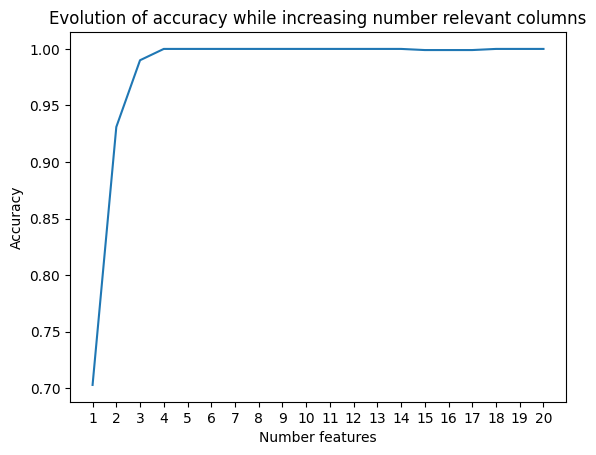

In [ ]:
vector_of_means = np.zeros(20)
for i in range(20):
    X_new = SelectKBest(
        mutual_info_classif, k = i + 1
    ).fit_transform(X2, y)
    cv_scores = cross_val_score(
        nb.KNeighborsClassifier(),
        X = X_new,
        y = y,
        cv = cv,
        scoring = "accuracy"
    )
    vector_of_means[i] = np.mean(cv_scores)

plt.title("Evolution of accuracy while increasing number relevant columns")
plt.xlabel("Number features")
plt.ylabel("Accuracy")
plt.xticks(np.arange(0, 21, step = 1))
plt.plot(
    range(1,21),
    vector_of_means
)
plt.show()

Comparación entre poner weights y no ponerlos, evolución del accuracy según el número de vecinos a tener en cuenta

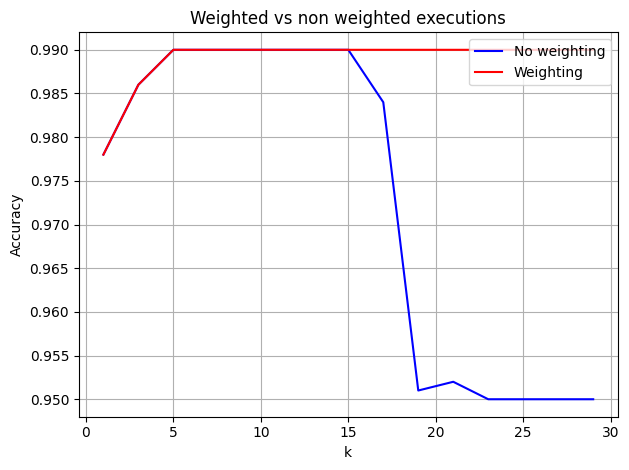

In [8]:
X_new = SelectKBest(
    mutual_info_classif,
    k = 3
).fit_transform(X, y)

no_weighted_means = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(
        nb.KNeighborsClassifier(n_neighbors = ki),
        X = X_new,
        y = y,
        cv = 10
    )
    no_weighted_means.append(np.mean(cv_scores))

plt.plot(
    range(1,30,2),
    no_weighted_means,
    "b",
    label = "No weighting"
)

weighted_means = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(
        nb.KNeighborsClassifier(
            n_neighbors = ki,
            weights = "distance"
        ),
        X = X_new,
        y = y,
        cv = 10
    )
    weighted_means.append(np.mean(cv_scores))

plt.plot(
    range(1,30,2),
    weighted_means,
    "r",
    label = "Weighting"
)

plt.title("Weighted vs non weighted executions")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc = "upper right")
plt.grid()
plt.tight_layout()
plt.show()

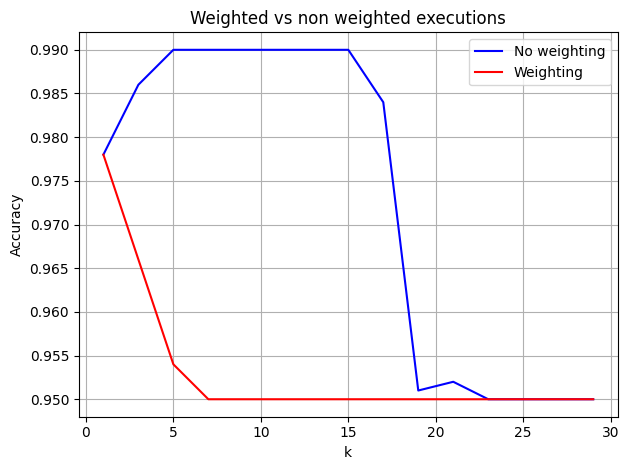

In [23]:
X_new = SelectKBest(
    mutual_info_classif,
    k = 3
).fit_transform(X, y)

no_weighted_means = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(
        nb.KNeighborsClassifier(n_neighbors = ki),
        X = X_new,
        y = y,
        cv = 10
    )
    no_weighted_means.append(np.mean(cv_scores))

plt.plot(
    range(1,30,2),
    no_weighted_means,
    "b",
    label = "No weighting"
)

weighted_means = []
def custom_weights(distances):
    return 1 / (distances ** 2)
for ki in range(1,30,2):
    cv_scores = cross_val_score(
        nb.KNeighborsClassifier(
            n_neighbors = ki,
            weights = custom_weights
        ),
        X = X_new,
        y = y,
        cv = 10
    )
    weighted_means.append(np.mean(cv_scores))

plt.plot(
    range(1,30,2),
    weighted_means,
    "r",
    label = "Weighting"
)

plt.title("Weighted vs non weighted executions")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc = "upper right")
plt.grid()
plt.tight_layout()
plt.show()

Separamos los datos apra entrenar y los de testeo

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 3)
(200, 3)
(800,)
(200,)


Codificamos para pasar los strings de la variable que queremos predecir a números

In [25]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

Grid_search, con los 4-best parámetros

In [26]:
params = {
    "n_neighbors": list(range(1,30,2)),
    "weights": ("distance", "uniform")
}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(
    knc,
    param_grid = params,
    cv = 10,
    n_jobs = -1
)
clf.fit(X_train, y_train_encoded)

print(f"Best Params = {clf.best_params_}\nAccuracy = {clf.best_score_}")

Best Params = {'n_neighbors': 7, 'weights': 'distance'}
Accuracy = 0.9875


Score del modelo haciendo predicciones

In [28]:
predictions = clf.predict(X_test)

test_accuracy = accuracy_score(y_test_encoded, predictions)
print(f"Test Accuracy = {test_accuracy}")

Test Accuracy = 1.0
